# Chapter 3: Classification

### MNIST

In [1]:
#set up
import sys
import sklearn
import numpy as np
import os

#set seed
np.random.seed(1985)

In [2]:
#import MNIST data 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#seperate into X and y 
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


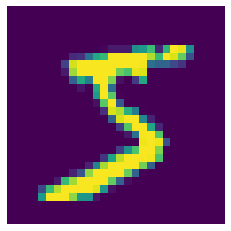

In [4]:
#plot first and second image 
import matplotlib 
import matplotlib.pyplot as plt 

first_digit = X[0]
first_digit_image = first_digit.reshape(28,28)

plt.imshow(first_digit_image)
plt.axis('off')
plt.show()

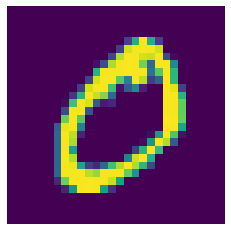

In [5]:
second_digit = X[1]
second_digit_image = second_digit.reshape(28,28)

plt.imshow(second_digit_image)
plt.axis('off')
plt.show()

In [6]:
#check labels
y[0], y[1]

('5', '0')

In [7]:
#seperate out into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
#shuffle within training set 
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Regularized Linear Decesion Boundary; Fit with SGD

In [9]:
#Binary classification of 5 
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
#define / fit model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 1985)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=1985)

In [11]:
#find first prediction
sgd_clf.predict([X[0], X[1]])

array([ True, False])

## Performance Measures

In [12]:
#cross validation error
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.96125, 0.96455, 0.9683 ])

In [13]:
#Naive Classifier 
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.9065 , 0.9106 , 0.91185])

In [15]:
import pandas as pd
print(pd.Series(y_train).value_counts(True, ascending = True))

5    0.090350
4    0.097367
8    0.097517
6    0.098633
0    0.098717
9    0.099150
2    0.099300
3    0.102183
7    0.104417
1    0.112367
dtype: float64


In [16]:
#Confusion Matrix 
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53878,   701],
       [ 1417,  4004]])

In [18]:
# Precision = TP / (TP + FP) accuracy of position predictions
# Recall = FP / (TP + FP) ratio of correctly detected 5s 
#
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred))

0.851009564293305 0.7386091127098321


In [19]:
#F1 - a balance between Precision and Recall - will only be high when both are 
#F1 = 2 / (Prec^-1 + Recall^-1)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7908354730396998

In [20]:
#Decision boundaries - the Precision / Recall tradeoff 
y_scores = sgd_clf.decision_function([first_digit])
y_scores

array([1370.73673355])

In [21]:
threshold = 0 
y_first_digit_pred = (y_scores > threshold)
y_first_digit_pred

array([ True])

In [22]:
#raising the threshold 
threshold = 200000
y_first_digit_pred = (y_scores > threshold)
y_first_digit_pred

array([False])

In [23]:
#get all y 'scores'
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [24]:
#precision recall curve plot 
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
def plot_precision_recall_vs_threshold(predictions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])
    plt.xlim([0,10000])
    

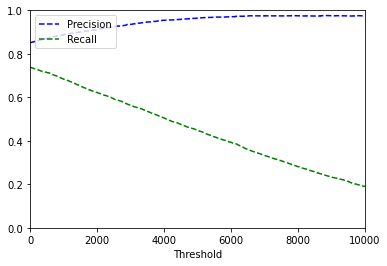

In [26]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [27]:
y_train_pred_90 = (y_scores > 1500)

In [28]:
precision_score(y_train_5, y_train_pred_90)

0.90020366598778

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.6522781774580336

In [30]:
#plotting the ROC curve 
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [31]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

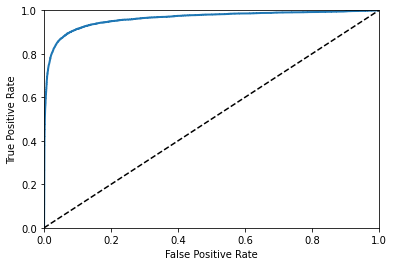

In [32]:
plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
#get AUC 
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5, y_scores)

0.9624285485504935

In [46]:
#train random forest just to compare 
from sklearn.ensemble import RandomForestClassifier 

forest_clf = RandomForestClassifier(random_state = 1985)
y_probas_forest = cross_val_predict(forst_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

In [35]:
#use probs as scores 
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

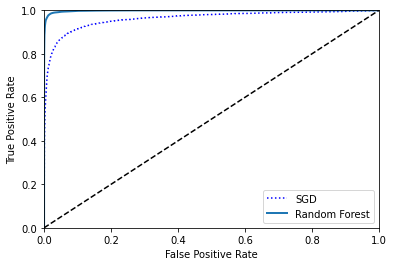

In [36]:
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

## Multiclass Classification

In [37]:
#training one versus all classification
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([first_digit])

array(['5'], dtype='<U1')

In [39]:
#check out decision scores
first_digit_scores = sgd_clf.decision_function([first_digit])
print(first_digit_scores)
np.argmax(first_digit_scores)

[[-15343.49694372 -27281.00499874 -13418.29062044    268.17431543
  -22200.19357725   5756.27408325 -23203.89385252  -8999.53670733
   -6728.86309459 -10331.47127748]]


5

In [41]:
#create one versus one classifier (good for models that don't scale well because training can happen in parallel)
from sklearn.multiclass import OneVsOneClassifier
ovo_clf  = OneVsOneClassifier(SGDClassifier(random_state = 1985))

In [42]:
#fit model & predict first digit
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([first_digit])

array(['3'], dtype=object)

In [44]:
len(ovo_clf.estimators_)

45

In [47]:
#train a random forest 
forest_clf.fit(X_train, y_train)
forest_clf.predict([first_digit])

array(['5'], dtype=object)

In [48]:
#check out class probs 
forest_clf.predict_proba([first_digit])

array([[0.  , 0.  , 0.01, 0.11, 0.  , 0.88, 0.  , 0.  , 0.  , 0.  ]])

In [49]:
#cross calidation scores
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.8847, 0.8489, 0.8668])

In [52]:
#check out what happens when we scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [ ]:
#this takes forever for whatever reason
#cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

## Error Analysis

In [53]:
#get full confusion matrix 
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5610,    0,   17,    8,   11,   52,   31,    5,  188,    1],
       [   1, 6421,   45,   24,    3,   45,    4,   10,  175,   14],
       [  23,   29, 5281,   96,   67,   30,   58,   38,  323,   13],
       [  25,   20,  118, 5300,    3,  217,   21,   45,  318,   64],
       [  13,   14,   44,   14, 5271,   10,   38,   25,  254,  159],
       [  32,   20,   30,  166,   54, 4533,   81,   20,  421,   64],
       [  28,   17,   53,    2,   42,   97, 5552,    6,  121,    0],
       [  22,   13,   54,   24,   49,    9,    4, 5734,  134,  222],
       [  19,   63,   41,  105,    3,  125,   30,   10, 5404,   51],
       [  23,   23,   29,   58,  123,   47,    1,  185,  282, 5178]])

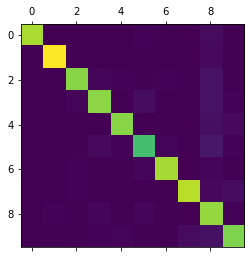

In [57]:
#make confusion matrix a figure
plt.matshow(conf_mx)
plt.show()

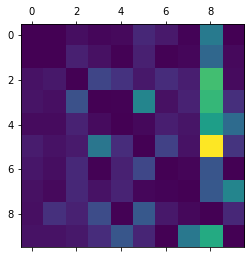

In [59]:
#normalize entries by the number of each entry
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0) # mask correctly estimated classes 
plt.matshow(norm_conf_mx)
plt.show()

## Multilabel Classification

This is the problem of when a response is labeled with a vector, say [1, 0 , 0] which describes the three possible classes that the response may contain. (e.g. [red, green, blue] in a picture). 

In [72]:
#construct a multilabel classifier
from sklearn.neighbors import KNeighborsClassifier 

y_train_large = (y_train.astype(int) >= 7)
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [75]:
#fit model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [76]:
#predict first digit 
knn_clf.predict([first_digit])

array([[False,  True]])

In [ ]:
#get f1 score averaged across labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_train, y_train_knn_pred, average = 'macro')